<a href="https://colab.research.google.com/github/amirulaimanr/Data-Visualization-with-Google-Looker-Studio/blob/main/%5BAIBE%5D_Load_Crime_Data_into_BigQuery.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import library to read csv file
import pandas as pd

# Import library for calculation purpose
import numpy as np

# Import library to load data into BigQuery
import pandas_gbq

import base64
import oauth2client.clientsecrets
import copy

# Import Google Authentication Library
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate User
auth.authenticate_user()
gauth = GoogleAuth()

# Provide authentication access to Google Drive
gauth.creadentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
project_id = "aibe-amirul-march2023"
dataset = "sources"
table_name = "crime_dataset"

In [ ]:
google_drive_link = 'https://drive.google.com/file/d/1BXN7YXr6BnrBguGdOiBWUw0TQWmzCzsA/view?usp=sharing'
google_drive_file_name = "crime_data.csv.zip"

In [ ]:
# Extract Google File ID from google drive link
id = google_drive_link.split("/")
print(id)
id = id[-2]
print(f"Google File ID : {id}")


download = drive.CreateFile({"id": id})


['https:', '', 'drive.google.com', 'file', 'd', '1BXN7YXr6BnrBguGdOiBWUw0TQWmzCzsA', 'view?usp=sharing']
Google File ID : 1BXN7YXr6BnrBguGdOiBWUw0TQWmzCzsA


In [ ]:
import io

import google.auth
from googleapiclient.discovery import build
from googleapiclient.http import MediaIoBaseDownload

service = build('drive', 'v3', credentials=creds)

In [ ]:
def download_file(real_file_id):

    creds, _ = google.auth.default()

    try:
        # create drive api client
        service = build('drive', 'v3', credentials=creds)

        file_id = '1BXN7YXr6BnrBguGdOiBWUw0TQWmzCzsA'

        # pylint: disable=maybe-no-member
        request = service.files().get_media(fileId=file_id)
        file = io.BytesIO()
        downloader = MediaIoBaseDownload(file, request)
        done = False
        while done is False:
            status, done = downloader.next_chunk()
            print(F'Download {int(status.progress() * 100)}.')

    except HttpError as error:
        print(F'An error occurred: {error}')
        file = None

    return file.getvalue()
  

if __name__ == '__main__':
    download_file(real_file_id='1BXN7YXr6BnrBguGdOiBWUw0TQWmzCzsA')

Download 100.


In [ ]:
from google_drive_downloader import GoogleDriveDownloader as gdd

gdd.download_file_from_google_drive(file_id='1BXN7YXr6BnrBguGdOiBWUw0TQWmzCzsA', dest_path='/content/')

In [ ]:
import zipfile
with zipfile.ZipFile("/content/sample_data/crime_data.csv.zip", "r") as zip_ref:
  zip_ref.extractall()

In [ ]:
# Read csv file with Pandas
df = pd.read_csv("crime_data.csv")
df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,11094370,JA440032,09/21/2017 12:15:00 AM,072XX N CALIFORNIA AVE,1122,DECEPTIVE PRACTICE,COUNTERFEIT CHECK,CURRENCY EXCHANGE,True,False,...,50.0,2,10,1156443.0,1947707.0,2017,03/01/2018 03:52:35 PM,42.012293,-87.699714,"(42.012293397, -87.699714109)"
1,11118031,JA470589,10/12/2017 07:14:00 PM,055XX W GRAND AVE,1345,CRIMINAL DAMAGE,TO CITY OF CHICAGO PROPERTY,JAIL / LOCK-UP FACILITY,True,False,...,29.0,19,14,1138788.0,1913480.0,2017,03/01/2018 03:52:35 PM,41.918712,-87.765511,"(41.918711651, -87.76551063)"
2,11134189,JA491697,10/30/2017 11:52:00 AM,043XX S TALMAN AVE,4651,OTHER OFFENSE,SEX OFFENDER: FAIL REG NEW ADD,APARTMENT,True,False,...,12.0,58,26,1159425.0,1875711.0,2017,03/01/2018 03:52:35 PM,41.814670,-87.690727,"(41.814669784, -87.690726696)"
3,11156462,JA521389,09/29/2017 06:45:00 PM,055XX W BELMONT AVE,1110,DECEPTIVE PRACTICE,BOGUS CHECK,CURRENCY EXCHANGE,True,False,...,30.0,19,11,1138653.0,1920720.0,2017,03/01/2018 03:52:35 PM,41.938581,-87.765831,"(41.938581442, -87.765830579)"
4,11164874,JA531910,12/01/2017 06:20:00 AM,022XX W CHICAGO AVE,0265,CRIM SEXUAL ASSAULT,AGGRAVATED: OTHER,STREET,True,False,...,32.0,24,02,1161264.0,1905292.0,2017,03/01/2018 03:52:35 PM,41.895805,-87.683159,"(41.895805099, -87.683159355)"


In [ ]:
new_columns = []
for column in list(df.columns):
  new_columns.append(column.lower().replace(" ", "_"))
print(new_columns)

['id', 'case_number', 'date', 'block', 'iucr', 'primary_type', 'description', 'location_description', 'arrest', 'domestic', 'beat', 'district', 'ward', 'community_area', 'fbi_code', 'x_coordinate', 'y_coordinate', 'year', 'updated_on', 'latitude', 'longitude', 'location']


In [ ]:
df.columns = new_columns
df.head()

,id,case_number,date,block,iucr,primary_type,description,location_description,arrest,domestic,...,ward,community_area,fbi_code,x_coordinate,y_coordinate,year,updated_on,latitude,longitude,location
0,11094370,JA440032,09/21/2017 12:15:00 AM,072XX N CALIFORNIA AVE,1122,DECEPTIVE PRACTICE,COUNTERFEIT CHECK,CURRENCY EXCHANGE,True,False,...,50.0,2,10,1156443.0,1947707.0,2017,03/01/2018 03:52:35 PM,42.012293,-87.699714,"(42.012293397, -87.699714109)"
1,11118031,JA470589,10/12/2017 07:14:00 PM,055XX W GRAND AVE,1345,CRIMINAL DAMAGE,TO CITY OF CHICAGO PROPERTY,JAIL / LOCK-UP FACILITY,True,False,...,29.0,19,14,1138788.0,1913480.0,2017,03/01/2018 03:52:35 PM,41.918712,-87.765511,"(41.918711651, -87.76551063)"
2,11134189,JA491697,10/30/2017 11:52:00 AM,043XX S TALMAN AVE,4651,OTHER OFFENSE,SEX OFFENDER: FAIL REG NEW ADD,APARTMENT,True,False,...,12.0,58,26,1159425.0,1875711.0,2017,03/01/2018 03:52:35 PM,41.814670,-87.690727,"(41.814669784, -87.690726696)"
3,11156462,JA521389,09/29/2017 06:45:00 PM,055XX W BELMONT AVE,1110,DECEPTIVE PRACTICE,BOGUS CHECK,CURRENCY EXCHANGE,True,False,...,30.0,19,11,1138653.0,1920720.0,2017,03/01/2018 03:52:35 PM,41.938581,-87.765831,"(41.938581442, -87.765830579)"
4,11164874,JA531910,12/01/2017 06:20:00 AM,022XX W CHICAGO AVE,0265,CRIM SEXUAL ASSAULT,AGGRAVATED: OTHER,STREET,True,False,...,32.0,24,02,1161264.0,1905292.0,2017,03/01/2018 03:52:35 PM,41.895805,-87.683159,"(41.895805099, -87.683159355)"


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340969 entries, 0 to 340968
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    340969 non-null  int64  
 1   case_number           340969 non-null  object 
 2   date                  340969 non-null  object 
 3   block                 340969 non-null  object 
 4   iucr                  340969 non-null  object 
 5   primary_type          340969 non-null  object 
 6   description           340969 non-null  object 
 7   location_description  339883 non-null  object 
 8   arrest                340969 non-null  bool   
 9   domestic              340969 non-null  bool   
 10  beat                  340969 non-null  int64  
 11  district              340964 non-null  float64
 12  ward                  340967 non-null  float64
 13  community_area        340969 non-null  int64  
 14  fbi_code              340969 non-null  object 
 15  

In [ ]:
# Transform text date into DateTime Object
# 12/01/2017 06:20:20 AM
# https://strftime.org/
df["date"] = pd.to_datetime(df["date"], format="%m/%d/%Y %I:%M:%S %p")
df["updated_on"] = pd.to_datetime(df["updated_on"], format="%m/%d/%Y %I:%M:%S %p")

In [ ]:
# Create a new table in BigQuery with Dataframe
# Replace the table if exists
pandas_gbq.to_gbq(
    df,
    f"{dataset}.{table_name}",
    project_id=project_id,
    if_exists="replace"
)

100%|██████████| 1/1 [00:00<00:00, 1698.79it/s]


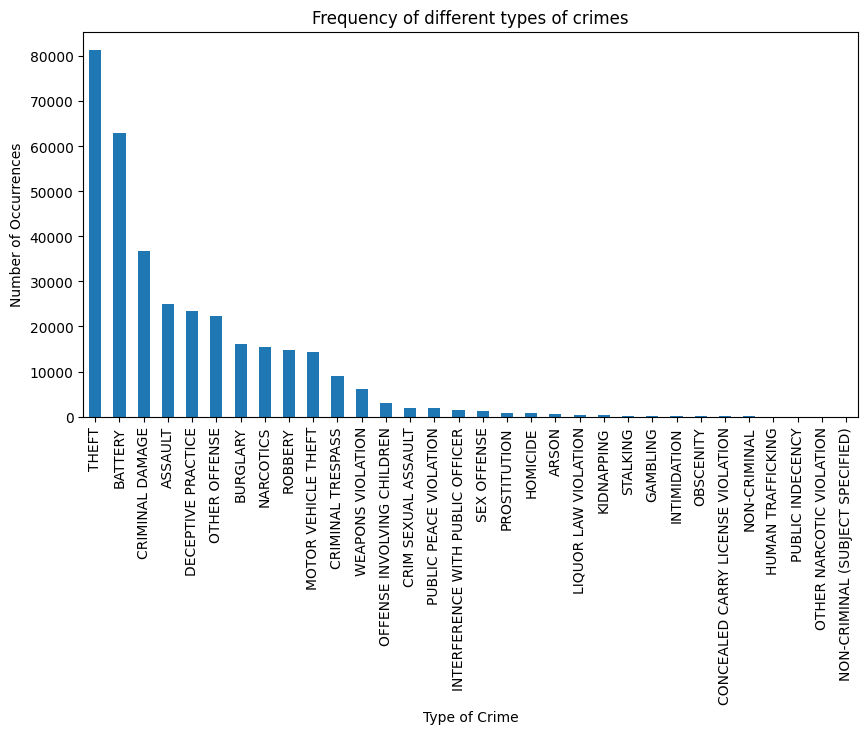

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Count the number of occurrences of each crime type
crime_counts = df["primary_type"].value_counts()

# Create a bar chart of the crime frequencies
crime_counts.plot(kind='bar', figsize=(10,5), title='Frequency of different types of crimes')
plt.xlabel('Type of Crime')
plt.ylabel('Number of Occurrences')
plt.show()